In [2]:
import numpy as np
import matplotlib as mpl
import IPython.display as display
import PIL.Image
import tensorflow as tf

In [18]:
url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUVFBgVFRUZGRgaGxwdHBsbHB0jIhsfIx0dHyIkIh0cIy0kHR0sHxobJTcmKi4xNDQ0GyM6PzozPi0zNDEBCwsLEA8QHxISHzkqJCozNTU1NTUzPDMzMzUzMzM1MzUzMzwzNTwzPDMzMzU1MzMzMzMzMzMzMzMzMzMzMzMzM//AABEIAMgA/AMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAADBAIFBgABB//EAD8QAAECBAQEBAUCBAYCAQUAAAECEQADITEEEkFRBWFxgSKRobETMsHR8ELhBlJy8RQjYoKSojOyFSRDwtLi/8QAGgEAAwEBAQEAAAAAAAAAAAAAAQIDAAQFBv/EACsRAAICAgICAgIBAgcAAAAAAAABAhEDIRIxBEETYSJRgXGhBRQywdHh8f/aAAwDAQACEQMRAD8AwGGSpC6OTWoK/Rh9DDKE5wE6PoFa81EQBS2NRobaG2h3g2DV4gyibfLms+5MegopMi2zW4HChOUhvCMocVDDfexdukPzMIblw7PWn3HnEMNMBCWfLZ9Bs+7M3aG1rBdVHLOXpQ+lo8zypZlNcVoMFFp8mZjjPBpYlH4aAnI6nBLpqKblLE00jMqXMDJILAMCyai9y5jccVy/DWQsBwQQ9w9oxvw3s3n949LDDlG2LyLHgSJiiQcxTQMS6ews4AiwxvDpakqUlJCmah+XYhmq/mCdooMBi1S6CrEOHBD8ntQ6fQRbL45MVREoHclqvp5dIScZNpw69h/d9lD8RQoQdHqD6sYs8Mp0o8ShYDUDWuorbaA4nC+HMtC0lycuUqAru8E4KhJmAkHX9II5aU6nfSOiKa7FezU4TDpRmNC7VNSb9vN4DiMCFgOGULKGjGhOoNRV4P8A4hJYuCSzANc9Kgv07iBzZjFQUMvhJfchjZ9vWOCPP5N/9hdUUGLBSo1VRsxQ5q2qakHr2MdLU+ZQDEMQCWfm+Whc84vuGpHwkjK5AIJNSQ+6g7sefWJ43D+BTJajvmAHuKfbnFf8yvk4NG4OuRVpWVISgr/zCAohwCkONAAT19IMmagOlKF3JzFSSonyZNWOt2eKtFfCGLMSxYDaqBmUeqqQJU1aElMuWEk6uzCvU1fU+zRf46e0DkxhUyYlRCgVAaguX/01qa3pZgIWxE1Wq1JfRnIp5DS9BzgYWd2G6WZ/qRBMMslYSGqRUiu2tHiyiq2AgvCKygjM/NWV+ZVc9miS8HNIBJXm0AKi3rd9eUapHD0MFMRmsC589z9TEV8OQCohgoj5iHZuRFB0jiyeTj5VodKVGcwsvVUxZAaiSQ/ItYR7ipSlKFSgPYEnvdzFhjMGUKzsymD9Nbdq86wtMUsgrB0IAPWOmNSVoW2LzMPMK0JdTEuSo1tXWghoqAOVJypF2JBVVm3b1gOHmAAqWolRUB/UPs+kBmKzTEi27VroOz+0aqANTs5c5ilLMADVT6U57w0hUxJCQpywoC4S2xd33JMDnoASXdxUnU6ZQRbtHvClrcoSBmLAAachvSpeFnoyIzMeoCqspFwMpKjpmJGVI84kpZmBgiasmodLAXrRyOzCLzC8MzVUMhsVN/66kncRay8EkGjjUPUnmRaIzzQggK30ZUS5mR1Ba2oUqCWPOhKvMiAT8OoI/wDEgbeIuOxVfrGzVhbqBVowoPZvwQFeH8LqS5e+V/QW6xFebHl9DqDoxSkFS8y5hFKEBTdHeg843XByDIllifCA73an0ilxOEIU4SFhrgVTtS/01pGi4dKIlIDAMkUeF8mcZJNFsF2z5rjEAJKglCmarEF7e8Bw+KB8IB6C/azxf8Rw4WhSkfNXMN2r+4jOyMP+t7KDb83jvxtvZz2mi2w+PyMUZ8tzYuWZqsWo7F2OsMf/AC4VmzkpcMGBI1qaOOgN4RDO4ofzTaB5+9dot8aYtkcdP+IEpyjwOHYb0YPSjbwtPWEoNgQCzAedPrBVLJFuwVbtAsU5lqJsBz3Ghf3hZvjB1+mPHbQhglMDzrr9IbCgTVIHUh37iGf4fwedBVs1yQCzXIFLjzEX8zg6T+ki3yl2Dc0nXUvzaOSHlQxxSZSUbZnZLD+cPohaa9oLJKUlyhQNWJX9NDEsfhRLUMoJSRruKHRwLUNiTVmhbDpNwWfkT9GjthKM1yj0yT0N4hiHRnKnB8WnPxQt/mKcrXq7E0JYVGlmggGWvzex7CCfCUbFIGwcnu9B5xm4rsC+iUjiE1AIKgQbGxB3t9IDiMVNVc9W1giOHPUzFj83JtHJwSg9QsHenelIm+CfJrYU/VgMNPIcJdzsTBZyUo+dQUTyW30fzEEl4UuASE7AZnP/AGHtEZ2Gf5SggXdROX7d3gvLFmSEl4h1AlIA8vQPFxwRIEwuAda37corJUhL1BeviBcHWjCh9Yj8cg78iD/7XgtctILNzLmA1/Dz9Y5cwUdnOj3ihwnEPA66gMPC501DO/MbRJeLRkzIdfMAeGr2uDHm5PD5Tv2Mp0qGeJDwLKlClgdQWFDvT0jOzsUVDKkjV2/Ufv8AaG8dilMlgVU1Fh/SSC3L+8V6cGCSpJaxS3M3rUHQiO3FCUY8RLT2FmICgkbKSnoWf7Q9gJIS8zUfKNiSUju1e8I/CcBqlJqQ/rsOwtDODcAlv15hta56NFlF+0BstJGEKi1nLAnQJ8JPm5iz4Xw/KAyctSok3LinWhf/AHQnh5xDJWwYX3enuz9YvcI6hUv4sr96nu/oI5fKnxiCPYdaXIHZ+sPJlpSnvvc8ybxyEVJOlfP8ELTZhv8Ajfc6x855Oav+DtxY7CqxQCfFX82eILUlTEOkk008nF4MiQE1pm1LOztQPpURPFEPZ/YwmFyu3/YeaXorsdkzJUXCi3j+mYU1t+8WOAQVIDioo+7awnNRzDe6b1Hke8G4fnCGYUUsDpnU3o0elKnBJEcd8mZDHHISUjxMKaK2PLb8MUmQJzNZVRu2oI5GkaTEIJKg4IrWtd/7dd4SmSAqWEqAzpcoJDuNuoPuI9bHPjKn0zm46KmYcu9bRwS7Air1uD3Fj2ga5ikliKHyPIg2tHqJocJCgRfKT8vKsdPL0Cj3EIGoJFgRTzH3hXGgfDIalALbi9IJPDHMAkbN+xhfFqBlkDcPc+sLm/0NDQ7Rov4ZCRITUEkuxHsW2eNApYL0o1Q1r66RjOF4paZaWAIFwbH7RYS+JLf/AMdatUsPr9eceNn/AMOllaknrstHMo2ifG0pAQGVVQJrZhUA3B8QpFRLlu4Gj7lvL7wyoTJqqgkOat4Uvs/zGg8hWHsLhilCqlrG1BdqfMonSw7R62KPx41H2c8nbsrpWFN3Pc1PnQDkKw/LlkB8oJ0T9WuYaEkgAkBJ53A+/WIg1dL/AH7m8JLIvRtsZw2FUqqs3aDHAyRUqBV1+lngilLyEqUosLAZR0cxUHEAlilHQ19jHMnPI7TpFPxj2WqZUs1oU6j/ACyO+YAx6vAyyM6MhZzYFumVmpFYjIHPw+4UoN2U7ROSsKIHiL6ggn1in5fwbQvKwsseKqVOXU3hV/UxDnzg87hktQdQb/WklupZiBziapZKSuUpE0J+ZLMsV9d2O0LygzFC1AH9L23/ALViqVuxLoUncLUkFaCaXDuC9mVqD+CK8TySoEFJa51aruOnvs0atE55eQHMHymjFB0zbpO/MRU8WwLyxMbncFtCHF7O+rVrDKWtmE0ALUPErO2YaBrF2oQ4D9jFjKwTyxm8LigPzAXYNfuYruEA/EZ3ytTq4f1P4I2UqUCNw2b0IA9/WI5s0sapDKNsoU8KRlIpmIo416hmMKJwaUrYugsQpi4OgNbgRrMVgkpSLk99jvcU9IqMdKWwZnSSx1AIAS78n9NoPj+RzfegTg4gMMpyHSXYA+jH/qfPlGl4agZXszkvTWMnIWehs4ty7A+8aTB44lYSpg+dx5HyDntC+bBuOgQey3nAlC2qKb21hNSrbQ5hlli7O/mHcelOohXGSWqm3sY+V8vHLT/R6OGa6HHzBxV/Qx5PUCK/nbSK6RMUKgtu32jyZNUpwC5J7Dr9onHyHrWxnj+woVm8VvCQOmYfQesO4MEIADc+uvrCa1JACKEhgE60a+wp+PDfDxmRRixIPW/1fvHsU+Cs54P8mZScopUUgZgknr+/7PHikKUBkq5DgNQ71t1ic1DLUSSK35/2hMLXKUZiHy+ha9Lj8Meuqap9nJdMPOQggpmJSlRo+h+oNfs8Vk/+Gy+YPSxq47jTm0XcnEy5gC2AN+l/TzjyYld81Hs1NN6RlzXYza9GdPDpn6kFWjjKX7Bj6R4rhCvElTJcWqNKOLCvWL6atQbKkO7P32pWOngJTmWtDMT+kCgJoBcsDrFJZG409CrvRnP4cWlQVLI8Y6mlNBtr1jQIkM5yLWBqoskcgkVEYXC4v4c1C7NU/UHekfQJkxSlZXJSNEsD3P6REcWRtU/Q84qzlArICSAeWggolJQDdx8pJch9QNPeIS1gEsQALkFugGpGn5UaTnWxsbD894aW1vSE6OWQWy32uT5R0/FIw6HmGpskAP8AftDRkLSPCCkn9RZ9ur211jFY1C1TKeJVgVUCdCSDU1sOYcwE4z2gpNMexHH5kw5UpGtLt107Da8chagPGm/8or6w5geHIlpALanMRchn9x5w1JOQheViQ1bkXoNN+kUUlFa7FatlZLlIUWFFX2P7iDy5JlucozGpBqlfbc7j1h6dhA5/ywTVmpma7N8qmqCKPEMOCPnckAEHdw4PI7tqCerpqSA9EOHYvxlickyxI8SFWyq+hN7RPH4EF1szMVZdDqR1Hi7ER5PwvhUlm+IhTdUgEH19IPhpfxAf9aQ+zip9SqFbp2hhILmyCFFiPlVzH3B1g6iFS1qQXSS7HQv7OAevWCTJCjJ8QzGwAuwLv7DuYq50pcszUjw5cxHNJJDeYT5QVT2YimWErdBbblW3r6GL2RijlSXALZdKdRzaKNJBCVizqBfr9yY9lzmJANRu/uNIOTEsiViqTizUjFAp8SgCLXqemp9or8ZOCgS4qW/GisTiSpSXVlbYqPvT0hlM5BDCrXJIf0FPOEh46gzSm2LYyWEJbQi2oaxG5hmRMCkoYgqRYmjg2r0pAJoCwwKSkHQh07do7DpyEpWBlsoah9Ryi00pRVARoOEzyQpGbOlP/NPL09OcXSJxyuag7B37fjRlsNiPhAsArYhwrzavd4al8WWCDmNRUFNz2O2tPpHlZvDc5WkVhlUUX6ZcsVKQD5ekQmLSXb5edB+/SKydxFRQ6CL/AKlOB5MYXmY2nypKjqC4foRyiOPwGnspLNaGsVjAxCVJSWJUtrCgYQ5weaPhBgWc1/m594z2KmFTlQKiasGv3+pi94LP/wArxku5u1BRhSkXy4lCH8gxStlXi5iUrUFfKpun7VfzgKJatLbVY8muDy6xLiONQmYEEgMKPY63OsMSylQBCmNHIP3+b3i2JtxV/oSaSkypm8PKlhcmZ8M1zJZ0K7PQ9vvHS8JNCnUpN65Hr/yNLRbLqXGVT3YMe4a8eIlpS9S+z09oupN6QnQhxSdklpUoB/iSwSNBmAPeu8VX8Tr/AMtIBdydbU2h7+KD/wDTqqHBSadYouMY74ktG9z1ZjrEMjq1/QrBdMz09FH3cekfTfhlSGKj5+FP284+cINQ9gT5a+ka3Fz1zRlTMASBVn8q6+sbArbBMex+PlSUBNFKUQxa52AuweIcMxRUtSVtmLEkNZjQ6AuQWqb2pGd4tNKVAhQKsuRJI8WlEjQ8+sMYHEFIDmqQ5QnU6lTO55VaLOKknFifZs8TiiQaBqqJq7sGFWbe8Z3IkzSv5i7ud2q2t38xtCqMUuZcFI/SLBPMga7Cp1pFhhUNLOU+LKcrUfSmzGBiwrGtGlNyZPDKdgoVCxbcso+WYD/aIKZpcuXbNTelAT2FIdnyhUhJH6u5AB/9R5RXz5Jy0vVSe4H1Ah9PZmOSMSlaEpU4yk+LYqoG5A5fMwhMUUrSkn9SgvySUnkGzfghdc3LNS5ITMGU/wCku9Obs0FWSpTFfjFCRq1leRII5xlGmCxlGIKmFxLBOZ6EAM3N6HzhmRLUlOUJYkK8Q3ZLepI7QhLmkpKFoUgg/OkOFNUAkORpDmHnE+HOVuPEdvNm1gyMhpEzxA6tVtqP6pT/AMoo+KoUpRQDeWkLJ0NV/wD4mHMbNmFKikMGZhVXl5t5wphpGVlTVHNmzZS3iWRUlj4m8OwEaK1ZrFMDIKJKUkVLmos/alx6x4lCgpioAbBZAP8AtIaLWRw4zAStZrX5Q37xM8HJfKaC+pY6sYDyqOkFRvsr8opYdwH9IKmYcrDLyOX6i4gs3hqkAKbOjdP5QwFOHSHUCw3+7W9IdT5IRxoWyOpSqBQOgbo6STcaineHEJUwBqkix06G/aIyUpcvX802eGVIOUZTmD03HIiCpCsXlylPemm3ZX09IaE5QBIBfUE0gPwlVPjD6AD6/WPVYVLOAOZJI9qRS0+zHpQTmO9Ra/MnSAysKSomZkI/079QbwVCKOgJ5nMT7gwGXwdS1EhSg98iQH/3XaJTdLsaIfOUg1AT/MSCr3CR5GNTwFWaSHNiQ+/p27RVYD+H0pylXYfNXvTzpF5LlsGCqdo8/wAjNF9HRigzGfxDLJnAJIqE62NRrRqCCS8ItKEqBp/MPlOmvPtEeLKbEgKcjLTdw7NuHFuZ3i+Xi0hJKCDmSQJe46NTuYrCclCKSFmk5OyhXxLKySkk70fvvBEcScWI5P8AvCUyWlSiQHTpmv5/eLbg+FB8RDM/oz0i2SSxx5MnG5OkUnHMQoyiGICqPf6NeMpnLN09o+mcY4c8taCPFkURY1qzNaobePmU035sfN44vlWTaLxjxVM8KmesXWGxQIuQQgVAehIsLZvDeKFaq/nSLfggzFYoPASCSzMWdz8tDeKYpVKgTjpjSEJmFS8uRaWTmIBLV3dlavesDVKWFJTLTkSGBIFSNn2Jv+CLDhUqXkISc4e4DJJ3BNVB9T9os5WDK3INB/2Lb6mOz8atkW3dFWsEli3NrdPy8WchWVmajCmlxbasWUvh2UA/DSVkeLMQSn2A6PBV8OTUgh6ckg0ZwDTraA80XoHCXYErU6kmoopNbpNFDsaiFMym+HZaFX/mSdR2r1eD4mSoBykpa1dDdjr0PMwFWIBbNsALB/3jVa0GyGPwAmpKdWdKtjp9u8V2IlzMgOVlAsS9DShSfofuItkg5SEqJfehHcQqmWLZ6v8AKoVJ7isaNrsDaK6RxVnC86F7kMDpyIPciDHFzVFgQw/U31Aiyly0lwpIt+pJbsXgEzDJSaqSybOwHuSYKkrpjC8rDKv8Rw701I5C/eLBKWcuSW0H1v2AhRUytCVK0CRQfXvA5KllVXKuvyg001I7xnBvbByocw/FlJ+VKiljZkud3dz3hGStkghJQU6pNedaFQ5PFjJwrjMpWUM4pZO507CIT5YBZg/l1ptASjtI1v2Q4dxNWdnYKu++hsOjsOcM4lgqgZ3JDaa9PEPbaI4LBpJChYpGYNZwcx5OUinOPZiyqWWbMn1BLH6RtctGfQlNkgLDWqHGwP7vBpKueUhuhEKoW6svM+w/eH8JhFLIKUi4D3rXyGvaHk+NtiVZxlqmUAcak29f3h6RwhAuA/IADzvFrIlJQMiakXOr/SCLSAWZz6DYVvHHPypcqitFo40lsFJ4fLIZn8wP7CCIwwSKCmjC5g6EFrXu2vL+mPc4TU9AB7J+8cs3KT2VSSQEk2UXa+3ntpS8GkLLW9ISKytRcsBdrDd1b8hDSZqQ4rf81hciofGzHcclPMUWdwPzeKsTApPhIUXsSzddR1aG/wCJQoTDlF/PTnUXpzhTDDOkEoOY7qqCDsax6mJrgv6HLNPk/wCo/LQpgWrFjwvFM4UADYVDHpq/7xQyJZQqudIsApsqvW/eJoxBJYk7tt+0HJiWWNWKnxdmi4zxEJlqUSHykB9/3P5rHzPFkZlAWzHycke7dovOM4gpl5aEKULN9ObRnZh/OescMsXxy43Z0Qdq2cfv7w/weUla8pDgBTh6Fst9w7U5QghWnI+x/O8WHBS0zr6s/wBoONfkr/YZdM0+HlAsgKdywCRQPSp6aRoOFo8CVZbs/IsaA60ueZ5xmTj20U2gbKnvqejRqeCYgqSPECLjcuz00qCG2i/kPWiONbLOVRywd2rHLD0YNuS4/O8eqVU2cl705wOQjKCCXKjT9vSPN5TUkkv5Oik0QxmFzyyhJq4YcwdDrQENzjD4uYD4CQH3+XoWqD5GNpxJJoa/M7JLO461sKRmcdLC5hsGuRlNdSQ9ydI9PxputkMi2JcLmqfJ8RCmNE52UG/qAJHWsO8QWs+JIQQKFlBRB/poUux1MJz+HJAz05nKQ3V0Efl4JnmFKUmagpTbw1HkaHyi9WybaoH/APIzQhiL2IJp6/WBS0kuqqtzlJbepYDz84cVhz8yiSQC6leLmGcsKQFM4/LmodNOtbmHVJaBZ7g+IJBIAZNGLVUfqabACPcMv4a3YVq6ib9tBApWGWkqIBU1Sr1+Y68hB5QKwCUNsOVe7l/WJ32Es0rzJCGoSQTuPE3dlBunSBfDWVHMgkmmYWb6QSXhjlaxI/S6vU/aBrRPTQyyUmjmv0MLGafTQaJqWUpy6Ggp59SbQGfOyy1etelKbfaPUJm6oCeia+lLRMcKVM+aiBoSNOQrC8knybD6oruES/jLJsmxLc7+sbHDSspZNEgZUjn+o/R+sCw0uWhIAHhszfNtzPSCImEEk0TuT6ACwjmy5XNjxSROYCCMgrp1P6jC86cJYv4U0JvmUdB3N+sRxmMIUEJ+dQoNUjVR2ivmrJHiORKRQqISlPNzdZ9I0I2rZm/0W4xKjY+EXUdhoHsOcI4rjEmWSZswJLfK+ZZHJKXyp5mMzjeL4eZLMpc1hoUZlM1gAAxqdYxq1aA06Md686wZKnoaMb7N3M/jXD5gEy15RZiA3PKzE9TGq4TxKXMlBaF5QdFBiDr16x8fl4dyGapGvvtaPoX8JzEf4cD4+QJUQBTkXGYOxJMJOFopFJAuMcOnTZpy5EoFM+ZbgbML10iWBwmQDOteaxCS4bQ1DiLPFoHxHMwjYUbyb3ivK/E9w98gHsIOFylGr19E8lJhMXw7PLLFTEXBFeoa8UKsLMlKyqBpuLjcAW6iNjhz4dGN9u20BxGHSpLAO1n05btFcWZxbjIlKN9GH/iFRCUpYirsQ5o1jtWKIF3G4foz/SNJ/E+Fyy0nZTN2fycRlk6dveEzPlJtFseoo9AY9vr+0OcPmhMxB0F/UfWEzRWlPWn3MEk1H5YJP19olfsZrZpFrSVFKU5m+Y5h6kvTRgCYv+CYoFS0BhlIrUuoAEsLlt+ZpGaw+KAmTVg0FMzWCXFKQXgS1EZgAVg5lEnVRd/zaOptS032Rqtn0aXNoFDKXsQW7+sEmzxm1Km/SX8yLDvGZlzZxU+ZAJbX7BvOGFSpi6rmMP8ASwJ7mJShGPY3JsYx3EHdIqoMQEhy/awEU+IlTVF1ApozBredO4i2lyRLDIRRt6nuanq0Q+IBdqaA27gwsMri/wAVr+4JRvsQ/wAAsywkqCU3Y1PlaJI4Ykiiv+n1gqcSgO6nrVKU1/5EwMT3qmXyAfMS/oIo8mStC8Yg8VhSmifFy/ZvrBcBwsE51l1cj8vlDClBJCVKD6JJZtTQMPMwJWOlpC2WklA8QCqJ2BJoFdoCnNx/3DxVj0vDg+Hw9NT5vAMXhEpIZKXJY8h3NewikmYubMUlSysJIJSJaWo36T0NVGvKCq4uiW3xFJRskmrM2xUfKCsckrbBaL7DTstKDoNOsFXxHQMTGVmfxMguyFTBqSkJSOpUR6t0jxP8Xy3qlY/pyEejPAeNext1o0wxhYnKAkfqVQf8QzxFGNS2UJqa2Z9bOad4qZnGJSkp+GStRF28SfNgmFl8SWa/DprmVfuA7dIZYrV0K2y8OOCWoXsVXYbDQfl4FOnzFrGRDAUdb33y3J8hGYnfxAoKI8CSRdNcvTMWB5sYq8VxWcr/AO4tzU1NEmulv3g/HFW0FRkzbzsTLkk/EmJBULrIzqrbKLJ5DaMx/EvEZc1UtKFFaElSplCBmIASwLO1exiiRMHiUwAu/PrDeGwUyYH+RJ1UKntBjByY1KOxVSAAVMKlh5ezNAkpAAa9TGkTwaV8pKzqxI13ytl8zEv/AIqUHOWtAGXM/wD2qfKHeKTYVkRmUodzqG7kxo+Cg/CFNToYieHSy4A1qorWz9B8x5Q9guGDL/4nrcqY+T0hZY37CpWXfF1gKckCrBx36M0V0mZL1BfkXHl+wjuNzJfxFArTm2V4dBZVjQRWpwqwApJSUnRx76+ZhfHiuCTEyP8AJsupUwpTmYlIq6TbprrYwycWFJoU1+VT0PcW6QiqcpISUqIWQCSEum1lA/QwBM9D+ImVUkgIzJJa4DEpf8MU4cttE7rQp/EyCqWVHKSNUqdqi+wcAd4xgPn9I3+NlpVLWFKKsySxFHDOPCpzzjBoQzZra/neIZFT0Wxu0RTY0rl+v7QxlykpGgI61b6wvhhUba9NfznBisEE++x+oIHnEGV9BcMo/DmHdJ9VHlsOUMcM4iZMzMA4IIUNxcM+vOAcPmgHIsshYyHpVj2JbvC5DAhTuNelvP6w7dpCpbZ9EwOLTNQFIOZJ2ZxuC1mhubOSzkpp+XtHzfh+KMtRKVZUqoq7daVpF1hJhDrz59KWpzLmK41y9kpxousTilLogqD7fe59O8eJmlgMzttWvMk/WKyfxFNgM52fwimrUNepisxE+aouVqDaIJSkf8SPWOjhS0iaTZpDKWHW2YaBCApXcvT1gsriCwCn4ZQWZ6BR7AkiMYjFTZZBCiWNluoH/k/0i6Rx2WUgkHOzMHKgdWNEtqKHnGcb7Qzi10W2QgZiycx1PiUepFewhXEYooGQeE0UEeEDwkKcJ+ZZpdTDzirXjJi3CQEPdamKyNNHEHwmFSDWqlGqjUmmpPteC4trYIqgU/EYiYolUxaQbsov50boAITTgxUhPUu57m5MOlFXY21Lv9u0BXMIOUVG1m6m3uYdpJXQbIqNGag3t5CnnWEZi2/UTyFAO1YcxUyoKiQNOvIfhiP+EUu4CR/qYFvoIV/l12OvsUlLVmGV8zPT9tPKLGZPmKFQBStz+PtDEiQkAJQxJ1Y+L/8An36QfKEB1MGLVIfqdngqEVpvYrl+kVEvCKzF0gk0FT4ew+Y94bHC0M5BUTqdTyG8PLXlDhJN7EC2gch+20DkT8+YpLsKvp20A21MGMYLQHKTAYHhyAc2V60qT3Adn5+W8W8pJcDybSns345ivVOCVBBPiU1LPyf38hFsmWQkLd0M50oL3ZhQAPS5NWh3OK0qFab7BolhX9A9TzPY+UTUhiSa+w5f2/ubDTzUhswoGLgEipDXADB9TCq5wSCVfp3LkHp/MT9hC39hSPJnLw0YNp0GkWPDEyxLAYHmVN5AadaxRrxTh1JUkPct6kGnSGcFjVFJyZmBbwpJDsNUhniUpxa7KRT/AEUvG5A+PMVlbxqexepqResLYfGrlvWnYt0cQbis8fGm+J/8xen+o8oQRMd2F9XA/eOfFaSDLsupHFTQ5kvpRP2vA8ZxhRPimFR/0gP/ANQPWKsgM3oP2cmJS5P+nL/V9ALR0PI29JCqKGlcYmKBSXYgjxEE2bztFWkuFU3b0j2Ysh2NDtHq2SL11/OvtHJkm5PZRKloCkZcp39m/PKBpNW/NIIEO4Ogp+dDEbiwffy84mMjyaanr7/npBSrMC5LsG9m9PSIoSSah8qfQOT7xwHpSMY9y0EFlOGzfLWjlj2HaBJNezxJFEnkx9U/QwU6doH0HXiCRRx2jxE80FDs7f2PpE8wAN360bor7x2EkZiSQAgUzAGp5ad46ucr7sTQ5gwmZ8xykA7/ANxbSG5mHWmjHZkk+RY8oAvDAeKWbNua/S8enGzEJSnOGqas4J2r37mC5y7YnfR4lK0kBTpToGr2Av1h7BElabM996trFfLxDoUpfiHUOSOtSXbcCGMNjUJmJUoKyoBNi7gUDeZ0tBU/x2zU7BJlzlFWVLhNLfj9niMzBTD8zhuQHpfziwlYiXlUsUYk5Vki4egBtQnWwgcqakhZDltS4JrZ96e0GM9bBK10K4fCgArAKiKO4H/ZVewaJJUtRqkM46eX6jzLwRS2p8Ot2puNRU69zAVTJxHhypAB1v8Av+aQebS0FbIzSrMSHI8QffsOWkE/xRtfRIIol9QBrT08l1YiYGKgyQBR3cAtf1PmYbw/GgARlF2NE0SO1VE72fzg5N7TDTPZC5yEf+MtTxM+howqUvXbeIoxKynxILgMQUXJOtK0sDS1I9lcRSo2UOSlZgP+Q8R8rw3j8egJEphnP8hsdLAA9o1S17NoEuY6VBnLi9bB711FtBQQ1gZqlIOYlRK84lkMH3rRTaCraRXyQCfmH9IY+Yf3vD2Aky1Lc0LO2VAYA3OYEdgIMo09M1o9QmYmYpSUqGhcKUau7XbQxy8KgAZkkE/6QG6BwfSPcTMmCZRRWg2GUJ90sesSm41S1iXKICE0OWhJL0JLijFy5DRKUG5X/wCBT0cAlgEklmf/ADD4b3SzJAubRc8PnsgAqV/xJ8igMRGXxKPh+OWc4zKCwoFQTR3dYGmwFtXeH+H4/EKRnlZAlRJbIq9jamkI4WOpUU3F5K1zV2AKlbV8RY26wmjBqb5h5fUPDWJmqzEm5JLjWvRvSAqWt9hsamGjKXrRmjxMnKrxULUCQT63ePFgMXd+YI96waWhSrIUyXsdf7N5R09CikjKW8/bpFuk9+gFflt1by/eITVB2uMuu/8AeJLNC38xbv8A3gBLsNbRzDsOghiGcgMCdNe/ffpEF3fVg55kx0gAOTV0n3H2iCl6n8/PrGoyJZwczuCQku+7hT8iG8jEQKlrUpXfn0jwg30ACX5kGn5tE1PlDD++npXvGCcQxYfgZx7x4k17B/MfaPAfCBv/AGjkC7A/lBGAMIUhS6gZB+lSmBPMtDUucUnwFBdgEpUab2JivSvKp27ehFfysGylRzJJSGplPWmlaRSMmunsDUfY3OxU0Zc6gxJ1JYX/AGg3ClImLCJhCkpBJIABJ2Ob6NFUZqkgElTvRyfd9uWsWOGxUiijLNZa0KdL5lnKAXrpmrsYLnJNIDS9DSlykrKpTlAomWa/ERaZpahbmIYwvDUKUohbyWzAj+VSTqaUEU4x3jkkoIEsAFq5mJctR6HWLTDiX8KYULAR8T5SaMogs3R/WNG26YGVCJgyiwKiardgLMVV3FR6QdElSVoExSchUlwhbu5DFuovzjwoTKlrQpSCoLCksXfxD6CFZmJWuWWQMqalQQXB08RdhSzw6dLszVlnPxgcAEmvhyinqXb+9IAcenM/w0kEliaEtSws/WKxc0uC7XL9S+99IdRMl/DKVIzLpUVY0sdmcU3gOb9ICggpmqUHUkISLsHcUpQ2ABtvHYmRLJVkNcoUDlUHL2qpnoD3gU3iEsoUkSyCQQL38hUND+FxM1YKZYlFKAlypG4OzOaQXt9hWkVvWWpADP4iXNtbaw0mch82XkOdaeZH9oaxWCnLyoWqUgOC6UkVZ+ZiqMhqBQLHfUE6EBo3OJlGy5k4gLLZUKZ/nomgqSQXYbCGFoWFBUtBJSHUQhQSKVYOW8NA9nihlKMtypSQAbE3dzpcOPaGFcQdJSl1qJYXaliBZ3MHlYvCmPq4iZjoTLUpjcrSkB7BzQlwacoGhClFX6MwYChtR6kBuT1eK7/ATgXKVIO+YAtTneo/Hia+FTAnMpL1Fi56nYQN+xuKL1Llwt1uGASsBHf+UNoIe4fIK0OlctAdsvxelsqWaMkrhU0B/hqI5OYd4XglLQSE2UQaa0P1hZb+jRjX2BxOKGckFg5u1uweBidmGlAT1HV/x48xKiFKcF9iD9a2EDksWFdj3/tC86Cw+HSpioqUFVsW9dYMnFrAykgkMoKNSK2ZN7cqR2GWAtiTR7dPrWPZsoO7kpUl6anZ7xH5LdP2Gio3GVmuD026NAUgc32I5biG5yKhgBVnf73gBSUnT37GGNZADpHBZbo5fyHowaJ4dAJrt6uP3iBX6n6H6tGCeJ69YOuocFv7BzC6K16/X6CJlTOIzA3ZGVdzoCft9+0Tk+FRCtd+oNdjRu8BSr7RyU3e+nPf86xvY3onOBKiLMT7xOWtSa3uCD+8B1b8PWDrSzB3u/W328oNi0ESt259O19YKFpDeFhq1zXSBYVBKiAopNagAm1qn8aCrlJZgtX/AFNf9qfvBTYGkPYbCS1JdYW7lmcDLpXWg94FjsNLQh0mZfUFu9PSFFpBb/MVTk3oBWPFSRlURMUWD1ep2qfoYb+TImhiBllqOj5fuBWJ4lCmAUnKl3IN30flX0g+JxIQQEgKQF5r6Bg2r0guYzF5yMr965RmJ6D6xNNp9DtIpwlBUSFJGtTR+2rxBSBUO9qh6ekXgky1lygNf/al2Dak0B7QGbLAJyoTmsGA+Y1PYAekO5WBCMjDoUAb2tmfm4ze0PYaQkaMHY1Z2s7xMcNWcqpTuwDqpmPvXprEDhVkMuYlKakhKXIFj4ia18L7vzh1TWlsSSZ02UVOpBINgQWcj8aLXgkx5ZQJgQUkuFywaku4L1rFLhMQQgICWICf+1X8iDEJynBJJb1G31h+KatOgK+mXWPSkTFfHXmZCSMiMtPFz3F31hDhUuXM+bNmCgBlJI9TEMPhZa5aSvNmZiSVH0YsPSDowskfJMIP9RHsBtC8XX2EHiEJTMYOUpPyhRGbqpNu0M4leUfElBCFMzyyc1dyVE+cK8RUQpJBDqAcu7UufzeEFqyFykqGmZSh6IandoRzl7Zkh2TPmLLzFqypFS4SO6lN9bxqODrw4l/OpTl3yktQUdIYdIyhnOxGVAFSoOoB2qxJrsOcPYFRKT81zqB6AUhvmdbQyiLL4XiVrP8AlrNbn7m8MyeEzSjKMMvMCzqTl1/mUQ9dqNrHR0cbm6KcVYXE8KmhJJllIoBUbWAerM76BzCysFMSWyFyXZw/zNvesdHQYyfBsWUVYZPCMQp/8pYY1cMPI/loSx/DpgzL+GsC6vCWrztdqR0dGU3ZuKoqVpUk2IpqPO/OGVYcGW6QoqS5NNAS/oRHR0Ub0AXMleiTUjQ9/UesEXIWVOlBs7NsHMdHRmwpbBDDLJ+U13FO8EVglZXL3LMC9OWxMdHQrkNxIKkrc+BVNQDo4vtX2g6JMwscimdmyl/Jvx48jo1h46CycKsePKoVoW8/ccvKHs8wmqieqUfa8dHQ0WBxIrSoeWssfeOSCXCpYLg1CACPImOjobkxOKEUYVTKBSdvlA9r/tDc3BqSUMtRK6G1LM/KrVjo6E5seic/BzJZQnMSFKCXYUFx6tBkFCApS0TSXIDIBo55tUivYR7HQVJ2BoLJxgsJc9gKUTc3JKlDxNTlC3EVhSQkS1oClJSXKT4Wb9JNA5/5Ex0dFb0LR2LJKQ6fkmfDFG8Hjb/aQQO0JKUSAouXICqaaggeKzjaOjoEZsLiiCMPMWVFGYAkn5T516xH4MzNlzKB6fSPY6NydG4on8GYk+MG4Aet2rTWCfCUXIFHYVu2+vOOjoVisfw2EUpJDEmxFSq9GcEXZgIteD8Ol/DOeWt8x57XLXd46OhZumPE/9k="


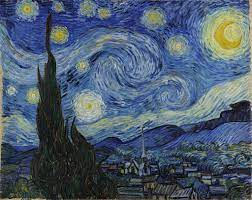

11822/11822 [==============================] - 0s 0us/step


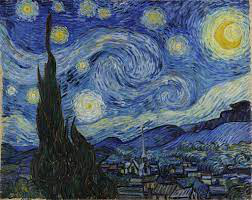

In [19]:
# Download an image and read it into a NumPy array.
def download(url, max_dim=None):
  name = url.split('/')[-1]
  image_path = tf.keras.utils.get_file(name, origin=url)
  img = PIL.Image.open(image_path)
  if max_dim:
    img.thumbnail((max_dim, max_dim))
  return np.array(img)

# Normalize an image
def deprocess(img):
  img = 255*(img + 1.0)/2.0
  return tf.cast(img, tf.uint8)

# Display an image
def show(img):
  display.display(PIL.Image.fromarray(np.array(img)))


# Downsizing the image makes it easier to work with.
original_img = download(url, max_dim=500)
show(original_img)
display.display(display.HTML('Image cc-by: <a "href=https://commons.wikimedia.org/wiki/File:Felis_catus-cat_on_snow.jpg">Von.grzanka</a>'))


In [20]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

In [21]:
# Maximize the activations of these layers
names = ['mixed3', 'mixed5']
layers = [base_model.get_layer(name).output for name in names]

# Create the feature extraction model
dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)


In [22]:
def calc_loss(img, model):
  # Pass forward the image through the model to retrieve the activations.
  # Converts the image into a batch of size 1.
  img_batch = tf.expand_dims(img, axis=0)
  layer_activations = model(img_batch)
  if len(layer_activations) == 1:
    layer_activations = [layer_activations]

  losses = []
  for act in layer_activations:
    loss = tf.math.reduce_mean(act)
    losses.append(loss)

  return  tf.reduce_sum(losses)


In [23]:
class DeepDream(tf.Module):
  def __init__(self, model):
    self.model = model

  @tf.function(
      input_signature=(
        tf.TensorSpec(shape=[None,None,3], dtype=tf.float32),
        tf.TensorSpec(shape=[], dtype=tf.int32),
        tf.TensorSpec(shape=[], dtype=tf.float32),)
  )
  def __call__(self, img, steps, step_size):
      print("Tracing")
      loss = tf.constant(0.0)
      for n in tf.range(steps):
        with tf.GradientTape() as tape:
          # This needs gradients relative to `img`
          # `GradientTape` only watches `tf.Variable`s by default
          tape.watch(img)
          loss = calc_loss(img, self.model)

        # Calculate the gradient of the loss with respect to the pixels of the input image.
        gradients = tape.gradient(loss, img)

        # Normalize the gradients.
        gradients /= tf.math.reduce_std(gradients) + 1e-8 

        # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
        # You can update the image by directly adding the gradients (because they're the same shape!)
        img = img + gradients*step_size
        img = tf.clip_by_value(img, -1, 1)

      return loss, img


In [24]:
deepdream = DeepDream(dream_model)
# deepdream.summary()

In [25]:
def run_deep_dream_simple(img, steps=100, step_size=0.01):
  # Convert from uint8 to the range expected by the model.
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  img = tf.convert_to_tensor(img)
  step_size = tf.convert_to_tensor(step_size)
  steps_remaining = steps
  step = 0
  while steps_remaining:
    if steps_remaining>100:
      run_steps = tf.constant(100)
    else:
      run_steps = tf.constant(steps_remaining)
    steps_remaining -= run_steps
    step += run_steps

    loss, img = deepdream(img, run_steps, tf.constant(step_size))

    display.clear_output(wait=True)
    show(deprocess(img))
    print ("Step {}, loss {}".format(step, loss))


  result = deprocess(img)
  display.clear_output(wait=True)
  show(result)

  return result


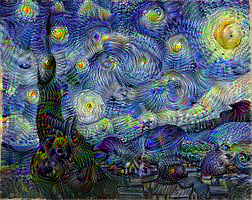

In [26]:
dream_img = run_deep_dream_simple(img=original_img, 
                                  steps=100, step_size=0.01)
